<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/classification_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Загрузка данных**

In [75]:
import numpy as np

In [76]:
! gdown --id 1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ym8EaWePP17RvrweKhWzCJmITXLgqvCZ
To: /content/churn-modeling.zip
100% 268k/268k [00:00<00:00, 67.6MB/s]


In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('/content/churn-modeling.zip')

# **Обучающая, тестовая и валидационные выборка**



In [79]:
from sklearn.model_selection import train_test_split

In [80]:
train, test = train_test_split(df,train_size=0.6,random_state=42,stratify=df['Exited'])

In [81]:
val, test = train_test_split(test,train_size=0.5,random_state=42,stratify=test['Exited'])

# **Человеческое обучение**

In [82]:
train['age_group'] = pd.cut(train['Age'],[0,31,35,40,46,float('inf')])

In [83]:
model = train.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()

<ipython-input-83-36b672851a22>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model = train.groupby(['NumOfProducts','age_group'])['Exited'].mean().reset_index()


In [84]:
model

,NumOfProducts,age_group,Exited
0,1,"(0.0, 31.0]",0.110764
1,1,"(31.0, 35.0]",0.140449
2,1,"(35.0, 40.0]",0.209337
3,1,"(40.0, 46.0]",0.370441
4,1,"(46.0, inf]",0.527607
5,2,"(0.0, 31.0]",0.033289
6,2,"(31.0, 35.0]",0.028037
7,2,"(35.0, 40.0]",0.061069
8,2,"(40.0, 46.0]",0.108647
9,2,"(46.0, inf]",0.236364


In [85]:
model = model.rename({'Exited':'score_prod_age'},axis=1)

In [86]:
train = train.merge(model,how='left',on=['NumOfProducts','age_group'])

In [87]:
test['age_group'] = pd.cut(test['Age'],[0,31,35,40,46,float('inf')])

In [88]:
test = test.merge(model,how='left',on=['NumOfProducts','age_group'])

In [89]:
! pip install catboost

In [90]:
from catboost import CatBoostClassifier

In [91]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [92]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [93]:
X = (['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'])

cat_features = ['Geography','Gender']

y = ['Exited']


In [94]:
df.select_dtypes(include='object')

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [95]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features)

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features)

In [96]:
params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [97]:
model = CatBoostClassifier(**params)

In [98]:
model.fit(train_data,eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 40.8ms	remaining: 40.8s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 2.57s	remaining: 22.9s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 4.88s	remaining: 19.4s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 7.08s	remaining: 16.4s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 9.45s	remaining: 14.1s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 12.1s	remaining: 12s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 15s	remaining: 9.96s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 17.5s	remaining: 7.45s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 19.8s	remaining: 4.92s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 22.1s	remaining: 2.43s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 23s	remaining: 0us

bestTest = 0.3185003

In [99]:
test['score_catboost'] = model.predict_proba(test[X])[:,1]

# **Скор и пороги**

In [100]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715


In [101]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

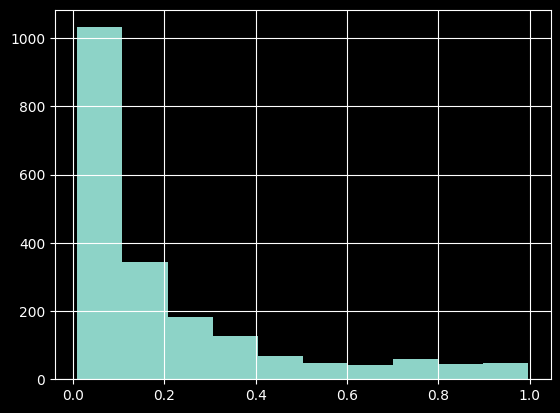

In [102]:
test['score_catboost'].hist();

In [103]:
train['Exited'].mean()

np.float64(0.20366666666666666)

In [104]:
test['y_pred'] = (test['score_catboost'] > 0.5) * 1

In [105]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


In [106]:
test['y_pred'].mean()

np.float64(0.1225)

# **Матрица ошибок**

In [107]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(test['Exited'],test['y_pred'])

array([[1537,   56],
       [ 218,  189]])

In [110]:
tn, fp, fn, tp = confusion_matrix(test['Exited'],test['y_pred']).ravel()

In [111]:
tn, fp, fn, tp

(np.int64(1537), np.int64(56), np.int64(218), np.int64(189))

# **Recall(полнота)**

In [112]:
recall = tp / (tp + fn)

In [113]:
from sklearn.metrics import recall_score

In [114]:
recall_score(test['Exited'],test['y_pred'])

0.4643734643734644

In [115]:
test['y_pred_1'] = 1

In [116]:
recall_score(test['Exited'],test['y_pred_1'])

1.0

# **Precision**

In [117]:
precision = tp / (tp + fp)

In [118]:
from sklearn.metrics import precision_score

In [119]:
precision_score(test['Exited'],test['y_pred'])

0.7714285714285715

In [120]:
precision_score(test['Exited'],test['y_pred_1'])

0.2035

In [121]:
test['Exited'].mean()

np.float64(0.2035)